## Kütüphaneler

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

## Dataset

In [2]:
df = pd.read_csv("./USArrests.csv", index_col = 0) #indexcol ile eyaletleri index olarak belirledik.
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T #Betimsel istatistikler

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

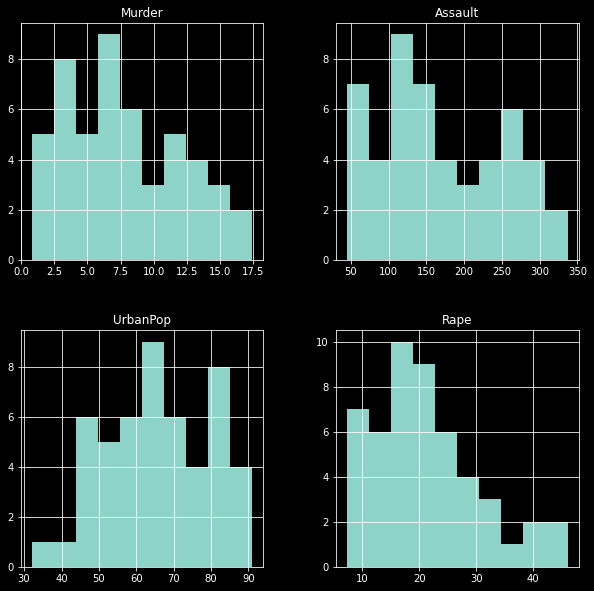

In [6]:
df.hist(figsize = (10,10))
#Dağılımlar çok da simetrik değil.

## K-Means

In [7]:
kmeans = KMeans(n_clusters = 4)

In [8]:
kmeans

KMeans(n_clusters=4)

In [9]:
k_fit = kmeans.fit(df)

In [10]:
k_fit.n_clusters

4

In [11]:
k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [12]:
k_fit.labels_

array([2, 2, 2, 1, 2, 1, 3, 2, 2, 1, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 1, 2,
       0, 2, 1, 3, 3, 2, 0, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 2, 0, 1, 1, 3,
       0, 1, 1, 0, 0, 1], dtype=int32)

## Kümelerin Görselleştirilmesi

In [13]:
k_means = KMeans(n_clusters = 2).fit(df) #2 değişken için kümeleme görselleştirilmesi yapacağız.
# Elimizde 2den fazla değişken varsa ve bunları 2 eksen üzerinde görselleştrimek istiyorsak, önce
# PCA ile 2 bileşene indirip öyle görselleştirmek gerek.

In [15]:
kumeler = k_means.labels_
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

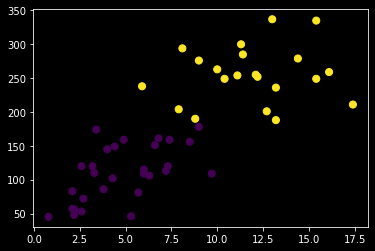

In [16]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
# bütün satırlar ve 1. sütunu al dedik.
# ikincide ise bütün satırlar ve 2.sütun.

In [17]:
merkezler = k_means.cluster_centers_
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

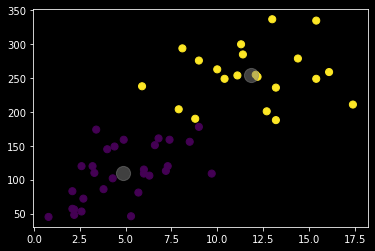

In [19]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "gray", s = 200, alpha=0.5)

## Optimum Küme Sayısının Belirlenmesi
### Elbow Yöntemi

In [20]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Küme sayısını neye göre seçeceğiz? Elbow methodu ile, 

In [21]:
ssd = [] #uzaklık farklarının karelerinin toplamı

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)
    

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

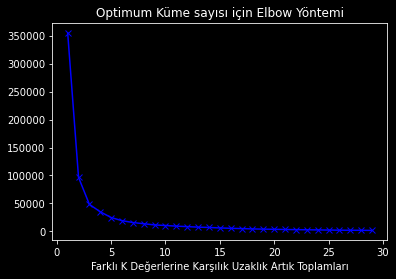

In [22]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

#Kırılımın en sert olduğu noktaya karar vermek gerekiyor.

In [23]:
!pip install yellowbrick

In [24]:
from yellowbrick.cluster import KElbowVisualizer #Bizim için görselleştirerek karar vermemizi kolaylaştıracak.

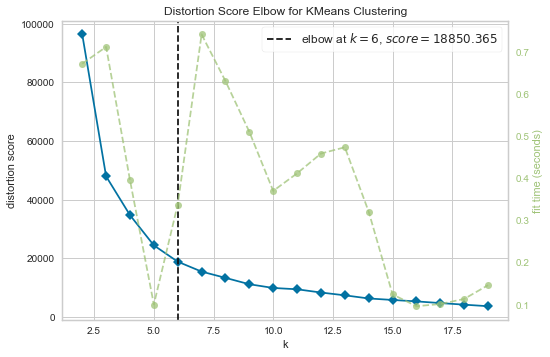

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof()

In [31]:
kmeans = KMeans(n_clusters = 6).fit(df)
kmeans

KMeans(n_clusters=6)

In [32]:
kumeler = kmeans.labels_

In [33]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,3
3,Arkansas,5
4,California,1
5,Colorado,5
6,Connecticut,4
7,Delaware,1
8,Florida,3
9,Georgia,5


In [34]:
df["Kume_No"] = kumeler
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,5
Connecticut,3.3,110,77,11.1,4
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,5


## Hiyerarşik Kümeleme

In [3]:
from scipy.cluster.hierarchy import linkage #Görselleştirme
from scipy.cluster.hierarchy import dendrogram #dendogram oluşturma

In [4]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [115.0, 115.0, 140.0, 140.0],
  [92.5, 92.5, 127.5, 127.5],
  [47.5, 47.5, 110.0, 110.0],
  [10.0, 10.0, 78.75, 78.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [243.75, 243.75, 282.5, 282.5],
  [225.0, 225.0, 263.125, 263.125],
  [187.5, 187.5, 244.0625, 244.0625],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [355.0, 355.0, 365.0

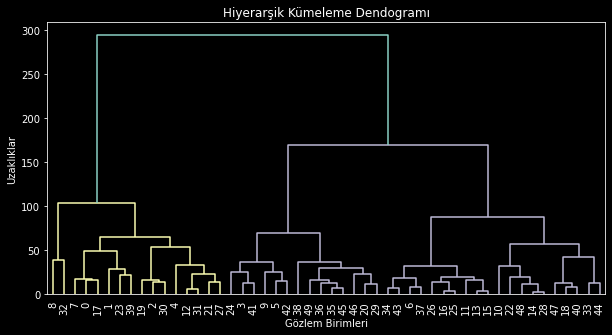

In [5]:
plt.figure(figsize = (10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
          leaf_font_size = 10) 
#x eksenindeki indexlerin boyutu=leaf_node_size
#x ekseni eyaletler.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [72.5, 72.5, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [91.25, 91.25, 142.5, 142.5],
  [33.75, 33.75, 116.875, 116.875],
  [10.0, 10.0, 75.3125, 75.3125],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [174.375, 174.375, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [252.5, 252.5, 282.5, 282.5],
  [198.4375, 198.4375, 267.5, 267.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [345.0, 

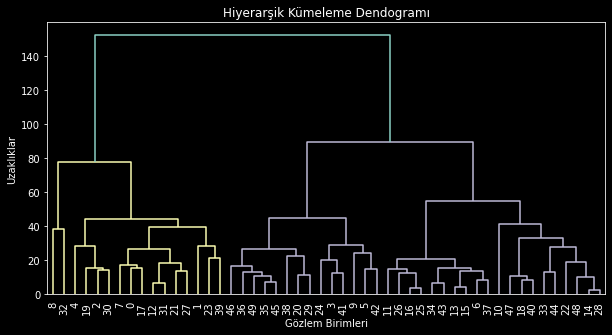

In [6]:
plt.figure(figsize = (10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
          leaf_font_size = 10)

# average da görsel değişti.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [17.5, 17.5, 71.25, 71.25]],
 'dcoord': [[0.0, 48.72514751132109, 48.72514751132109, 0.0],
  [0.0, 53.59337645642417, 53.59337645642417, 0.0],
  [48.72514751132109, 64.99361507102063, 64.99361507102063, 53.59337645642417],
  [0.0, 102.86155744494636, 102.86155744494636, 64.99361507102063],
  [0.0, 68.76227163205125, 68.76227163205125, 0.0],
  [0.0, 57.27102234114561, 57.27102234114561, 0.0],
  [0.0, 87.32634195934237, 87.32634195934237, 57.27102234114561],
  [68.76227163205125, 168.6114171697753, 168.6114171697753, 87.32634195934237],
  [102.86155744494636,
   293.6227511620992,
   293.6227511620992,
   168.6114171697753]],
 'ivl': ['(2)',
  '(3)',
  '(3)',
  '(3)',
  '(5)',
  '(6)',
  '(8)',
  '(10)',
  '(5)',
  '(5)'],
 'leaves': [88, 72, 81, 71, 85, 86,

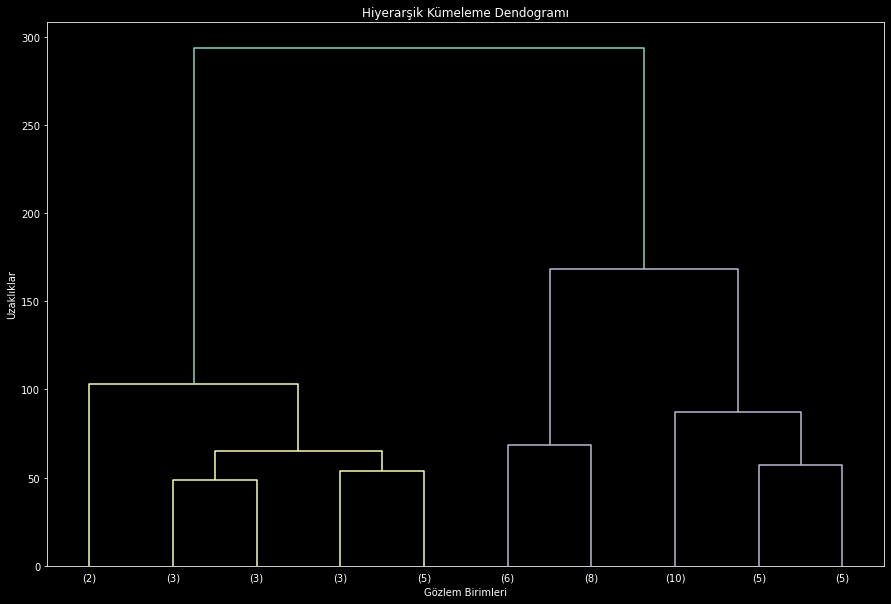

In [7]:
plt.figure(figsize = (15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
          leaf_font_size = 10)

#truncate_mode = en son p adet göster demek.
# p = 10 kümeye ayırdık.

## PCA (Temel Bileşen Analizi)

In [8]:
df = pd.read_csv("./Hitters.csv")
df.dropna(inplace = True) #boş olanları sildik.
df = df._get_numeric_data() #sadece sayısal değişkenleri seçtik.
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


Amacımız: oyuncuların bazı bilgilerini barındıran bu veri ssetindeki 14-15 değişkeni, 2-3 değişken ile temsil etmek istiyoruz.

In [9]:
from sklearn.preprocessing import StandardScaler
# Önce, standartlaştırma işlemi gerçekleştirmemiz gerekiyor.

In [10]:
df = StandardScaler().fit_transform(df)
df[0:5,0:5] #5 satırr, 5 sütunu standartlaştırılmış hali.

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #2 bileşen olarak belirledik. Bu PCA nesnesi.
pca_fit = pca.fit_transform(df) # Bu da pca'in uygulandığı nesne.

In [13]:
#Gözlemleyelim. Neler olduğunu.

bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen","ikinci_bilesen"])
bilesen_df #2 değişken ile temsil etmiş olduk.

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [14]:
pca.explained_variance_ratio_
# birinci bileşence verisetinin içinde bulunan değişkenliğin %45i açıklanabilmiş.
# ikinci bileşence verisetinin içinde bulunan değişkenliğin %25i açıklanabilmiş.
# Yani bu ikisini topladığımızda, verisetimizin içindeki değişkenliği %70 ile açıklayabiliyoruz bu iki değişken ile.
# Mesela 100 değişken olan bir verisetimiz var. Bunu 2-3 değişkenle ifade edebilmek çok iyi.

array([0.45245466, 0.24246801])

In [15]:
pca.components_[1] #zaten 2 bileşen var. rakam vermesek 2sini de gösterir.

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

Text(0, 0.5, 'Kümülatif Varyans Oranı')

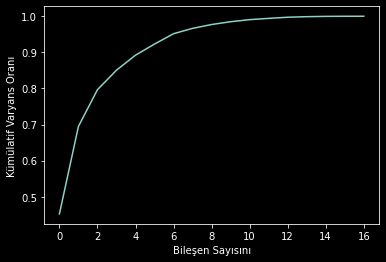

In [16]:
# Optimum bileşen sayısına karar vermek:

pca = PCA().fit(df) #değişken sayısı kadar bileşen oluşturuyor eğer içine argüman vermezsek
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #kümülatif toplam.
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")

#varyans: verisetinin taşıdıiğı bilgi. bileşen sayısı arttıkça, varyans artıyor.

In [17]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [18]:
# FİNAL
pca = PCA(n_components = 3) #3 e karar verdik. 3 bileşende %80 gibi bir açıklanma oranı var.
pca_fit = pca.fit_transform(df)

In [19]:
pca.explained_variance_ratio_
# Toplamları %80 gibi bir açıklanabilirlik.

array([0.45245466, 0.24246801, 0.1016968 ])